In [1]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

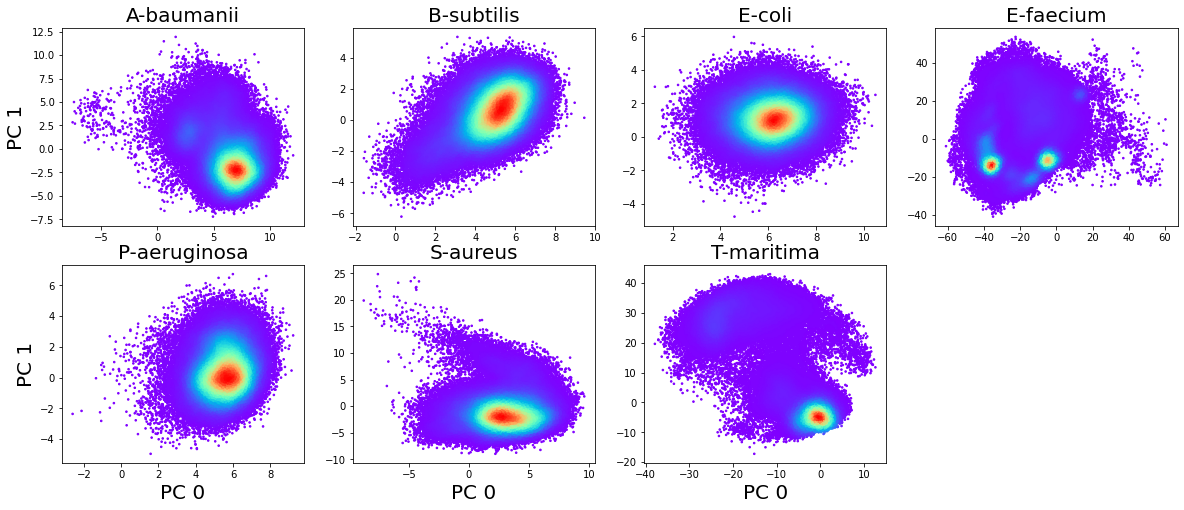

In [3]:
os.chdir('/Users/HQ/orange/Reza/eskape/moat/')

raw = pd.read_csv('raw.dat', delim_whitespace=True)

systems = 'A-baumanii B-subtilis E-coli E-faecium P-aeruginosa S-aureus T-maritima'.split(' ')

fig, axes = plt.subplots(2,4, sharex=False, sharey=False, figsize=(20,8))

for i in range(7):
    column = i % 4
    row = int(i/4)
    x = raw[raw.columns[1+(10*i)]]#[179000:180000]
    y = raw[raw.columns[2+(10*i)]]#[179000:180000]
    # x = [i for i in raw[raw.columns[1+(10*i)]][100000:105000] if i != 0.000]
    # y = [i for i in raw[raw.columns[2+(10*i)]][100000:105000] if i != 0.000]
    if len(x) != 0:
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        axes[row,column].scatter(x, y, c=z, s=10, marker='.', cmap='rainbow')
        axes[row,column].set_title(systems[i], fontsize=20)
    if row == 1:
        axes[row,column].set_xlabel('PC 0', fontsize=20)
        # axes[row,column].set_xticklabels(x, fontsize=15)
    if column == 0:
        axes[row,column].set_ylabel('PC 1', fontsize=20)
        # axes[row,column].set_yticklabels(y, fontsize=15)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
axes[1, 3].set_visible(False)

# plt.savefig('0vs2.png', dpi=300, bbox_inches='tight')
# axes[0, 0].legend()
# fig.colorbar(z)
# fig.colorbar(plt.cm.ScalarMappable(norm=None, cmap='rainbow'))


# ax[0, 0].scatter(x, y, c=z, s=10, marker='.', cmap='rainbow')

# plt.scatter(raw[raw.columns[1]],raw[raw.columns[2]], marker='.')

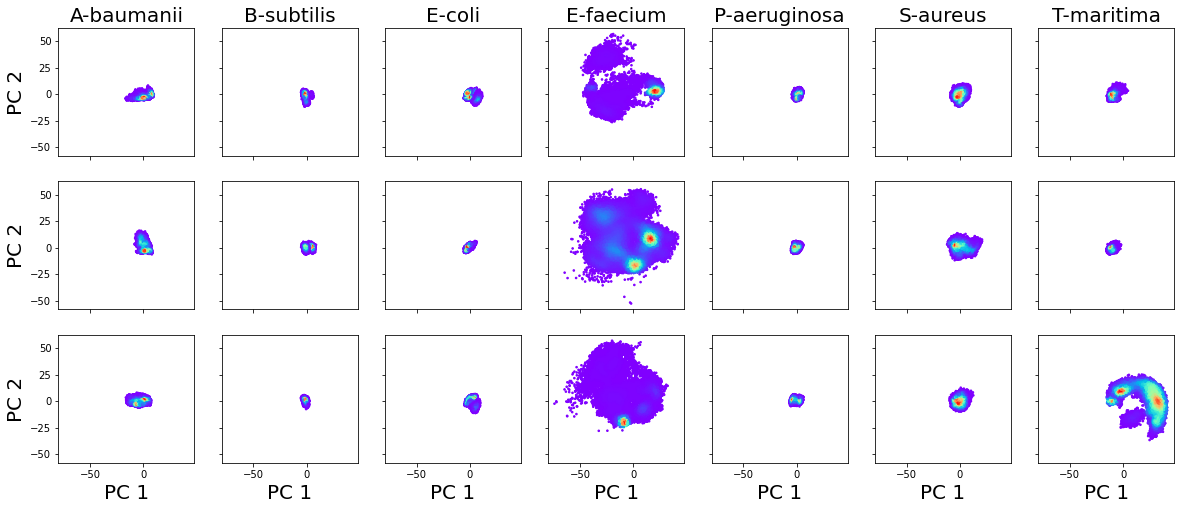

In [4]:
# individual

os.chdir('/Users/HQ/orange/Reza/eskape/')
systems = ['A-baumanii-1', 'B-subtilis-1', 'E-coli-1', 'E-faecium-1', 'P-aeruginosa-1', 'S-aureus-1', 'T-maritima-1']

fig, axes = plt.subplots(3,7, sharex=True, sharey=True, figsize=(20,8))

for i in range(7):
    raw = pd.read_csv(systems[i]+'/raw.dat', delim_whitespace=True)
    column = i % 7
    for j in range(3):
        row = j
        x = raw[raw.columns[1+(10*j)]]#[:100]
        y = raw[raw.columns[2+(10*j)]]#[:100]
    # x = [i for i in raw[raw.columns[1+(10*i)]][100000:105000] if i != 0.000]
    # y = [i for i in raw[raw.columns[2+(10*i)]][100000:105000] if i != 0.000]
        if len(x) != 0:
            xy = np.vstack([x,y])
            z = gaussian_kde(xy)(xy)
            axes[row,column].scatter(x, y, c=z, s=10, marker='.', cmap='rainbow')
        if row == 0:
            axes[row,column].set_title(systems[i][:-2], fontsize=20)
        if column == 0:
            axes[row,column].set_ylabel('PC 2', fontsize=20)
        if row == 2:
            axes[row,column].set_xlabel('PC 1', fontsize=20)
        # axes[row,column].set_xticklabels(x, fontsize=15)
        # axes[row,column].set_yticklabels(y, fontsize=15)

        # plt.yticks(fontsize=20)
        # plt.xticks(fontsize=20)
# axes[1, 3].set_visible(False)

plt.savefig('individuals-1vs2.png', dpi=300, bbox_inches='tight')



Text(0.5, 0, 'eigenvector')

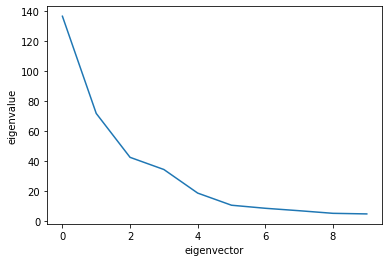

In [8]:
evecs = open('evecs.dat', 'r').readlines()
# for i in range(len(contributions)):
#     if contributions eve
contributions = [float(evecs[i+1].split(' ')[-1].split('\n')[0]) for i in range(len(evecs)) if '**' in evecs[i]]
plt.plot(contributions)
plt.ylabel('eigenvalue')
plt.xlabel('eigenvector')

In [4]:
contributions

['    1   136.76454\n',
 '    2    71.99610\n',
 '    3    42.74126\n',
 '    4    34.63220\n',
 '    5    18.91391\n',
 '    6    10.82918\n',
 '    7     8.79391\n',
 '    8     7.17228\n',
 '    9     5.43013\n',
 '   10     5.03649\n']

Text(0, 0.5, 'S (cal/Mol.K)')

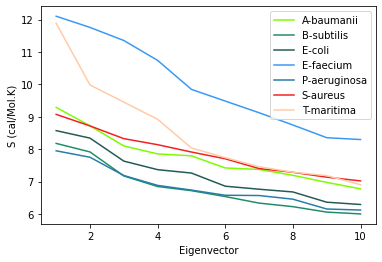

In [17]:
#quasi-harmonic

os.chdir('/Users/HQ/orange/Reza/eskape/')
systems = 'A-baumanii B-subtilis E-coli E-faecium P-aeruginosa S-aureus T-maritima'.split(' ')
bold = ['#fcff5d', '#7dfc00', '#0ec434', '#228c68', '#8ad8e8', '#235b54', '#29bdab', '#3998f5', '#37294f', '#277da7', '#3750db', '#f22020', '#991919', '#ffcba5', '#e68f66', '#c56133', '#96341c', '#632819', '#ffc413', '#f47a22', '#2f2aa0', '#b732cc', '#772b9d', '#f07cab', '#d30b94', '#edeff3', '#c3a5b4', '#946aa2', '#5d4c86', '#201923']

# fig, axes = plt.subplots(2,4, sharex=False, sharey=False, figsize=(20,8))
for i in range(len(systems)):
    raw = pd.read_csv(systems[i]+'-1/thermo.dat', delim_whitespace=True, skiprows=35)
    plt.plot(raw[raw.columns[-1]][:10], color=bold[2*i+1], label=systems[i])
plt.legend()
plt.xlabel('Eigenvector')
plt.ylabel('S (cal/Mol.K)')


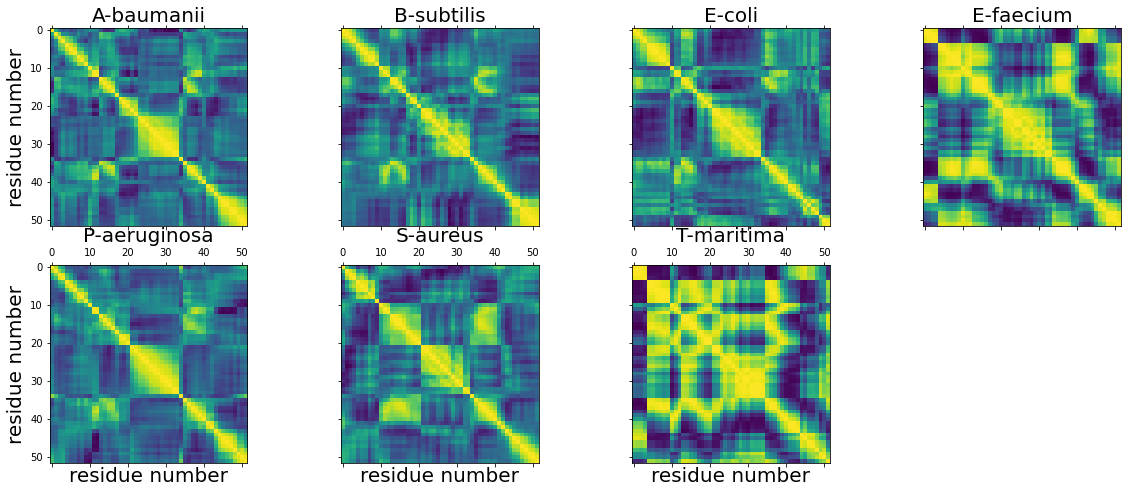

In [11]:
#DCCM

systems = 'A-baumanii B-subtilis E-coli E-faecium P-aeruginosa S-aureus T-maritima'.split(' ')

fig, axes = plt.subplots(2,4, sharex=True, sharey=True, figsize=(20,8))

for i in range(7):
    column = i % 4
    row = int(i/4)
    dccm = pd.read_csv(systems[i]+'-1/dccm.dat', delim_whitespace=True)
    axes[row,column].matshow(dccm.corr())
    axes[row,column].set_title(systems[i], fontsize=20)

    if row == 1:
        axes[row,column].set_xlabel('residue number', fontsize=20)
        # axes[row,column].set_xticklabels(x, fontsize=15)
    if column == 0:
        axes[row,column].set_ylabel('residue number', fontsize=20)
        # axes[row,column].set_yticklabels(y, fontsize=15)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
axes[1, 3].set_visible(False)

plt.savefig('DCCM.png', dpi=300, bbox_inches='tight')


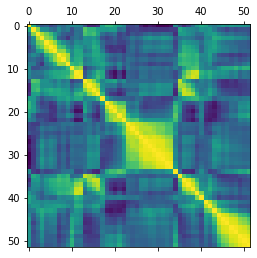

In [7]:
dccm = pd.read_csv(systems[0]+'/dccm.dat', delim_whitespace=True)
plt.matshow(dccm.corr())
plt.show()